## Quantum Teleportation

This file is for the use during the lecture and not directly dedicated to be used as a learning exercise. The goal of this file is to go through the circuit by explaining the action of the gates, based on the truth tables provided earlier.

In [1]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import random_statevector

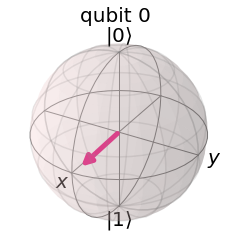

In [2]:
  # We want to teleport a random quantum state
  # So first, we need to define what this random state is
psi = random_statevector(2)
plot_bloch_multivector(psi)

The following code block creates a teleportation circuit and presents it as a drawing. You do not need to know everything in this block but it is provided so you can see the purpose of the previous learning exercises.

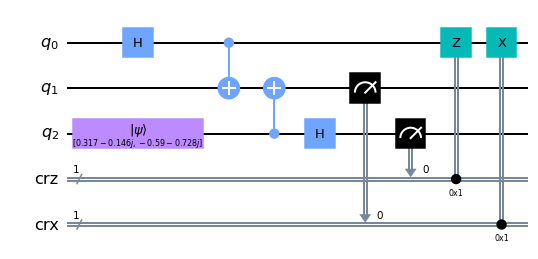

In [3]:
  # Now reate the "hardware" of our quantum computer
qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)  # Putting them all together in one "circuit"
teleportation_circuit.initialize(psi, 2)  # Initialise the state of the qubit that we wish to teleport
  # Apply Hadamard gate to the first qubit (0)
teleportation_circuit.h(0)
  # Apply cNOT gate with first as a control
teleportation_circuit.cx(0,1)
  # At this point, we have a bell state.
  # Now we apply the reverse (decoder), but to the second and third qubits
teleportation_circuit.cx(2,1)
teleportation_circuit.h(2)  
# Q: Is this the only order we can apply this?
# A: No, depends which qubit we want to teleport onto, For example if we inverted it, then q2 would teleport onto q1 instead of q0
  # Now Bob measures both his qubits (1 and 2) and sends results to Alice (0)
teleportation_circuit.measure(2,0)  # Measure qubit 1 and send the result to "classical bit" 0
teleportation_circuit.measure(1,1)  # Measure qubit 2 and send the result to "classical bit" 1
  # Now Alice applies gates depending on Bobs outcomes
teleportation_circuit.z(0).c_if(crz, 1) # Apply gates if the registers require, (this is to "extract" the teleported information)
teleportation_circuit.x(0).c_if(crx, 1)
teleportation_circuit.draw('mpl')

<b> After each gate in the above drawing, what is the state of the three qubits, assuming the initial state is 000, (i.e. ignoring the purple gate which is initialising the state we want to teleport)

Solutions:
After H1 the state becomes:             (|0> + |1>)|0>|0>
After the first cNOT the state becomes: (|00> + |11>)|0>
After the second cNot the state becomes:(|00> + |11>)|0>
After H2 the state becomes:    (|00> + |11>)(|0> + |1>)=
= |000> + |001> + |110> + |111>


The following code block runs simulations of our teleportation circuit. The output of this is the state vector of each three qubits as well as a histogram of the "average" final state.

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


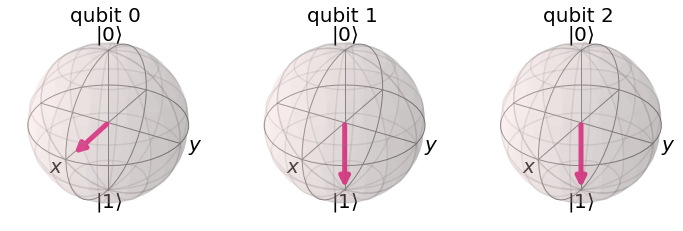

In [4]:
sim = Aer.get_backend('qasm_simulator')  # Define our simulation method
teleportation_circuit.save_statevector() # Tell the simulation to save the state vector as we run it
result = sim.run(teleportation_circuit, shots = 1000).result()
out_vector = result.get_statevector()
counts = result.get_counts(teleportation_circuit)
teleportation_circuit.reset(qubit=qr)  # Reset the circuit ready for the next run
plot_bloch_multivector(out_vector)

<b> Compare the above state vectors for qubits 0, 1 and 2 respectivly, with the state vector initialised on qubit 2 at the start of the circuit. Notice how the state has "teleported" from qubit 2 to qubit 0. Why did it teleport to qubit 0 instead of qubit 1?

<b> Because of how we arranged the last H and CX gates, if we changed them to act on the other qubits (i.e. last H acts on q1 and swap the control and target of the cnot) then q2 would teleport onto q1.

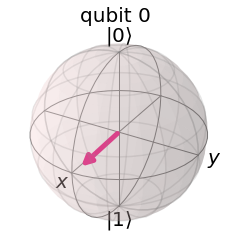

In [5]:
plot_bloch_multivector(psi)

Below you will see a histogram of the measurement results from the circuit, (the information that Alice sends to Bob so he may construct the teleported states). 

<b> What does it mean that each outcome is equally likely?

<b> When the measurements were made, all of the outcomes are equally likely because the states beforehand were in a superposition. When that superposition is forced to collapse, the q0 also colapses because it is "entangled" with qubits 1 and 2 as well. If the outcome is 00 then the state is directly teleported. If the outcome is something different then the state in q0 needs to be rotated to get back to the desired teleported state


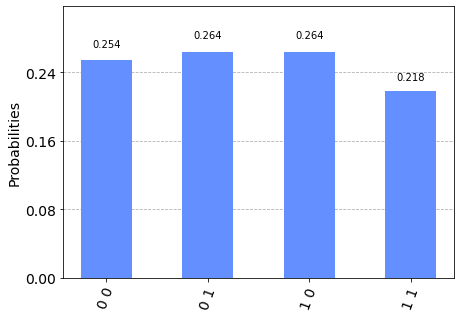

In [6]:
plot_histogram(counts)